In [1]:
import matplotlib.pyplot as plt #Visulization
from matplotlib import rc # 한글 깨져서
import seaborn as sns #Visulization
import pandas as pd
import numpy as np

import scipy as sp
import scipy.stats

import datetime as dt
from dateutil.relativedelta import relativedelta

import tensorflow as tf

tf.set_random_seed(777)
rc('font', family="Malgun Gothic")

from sklearn.preprocessing import MinMaxScaler

In [22]:
# mean_of_month = pd.read_csv("C:/Users/student/Desktop/d/mean_of_month_1.csv")
mean_of_month = pd.read_csv("C:/Users/PC/Desktop/d/mean_of_month_1.csv")

In [3]:
yyyymm_1 = '200801'
yyyymm_2 = '201812'

MONTH = relativedelta(months=+1)

fmt = '%Y%m'
date_1 = dt.datetime.strptime(yyyymm_1, fmt).date()
date_2 = dt.datetime.strptime(yyyymm_2, fmt).date()

yyyymm = []
while date_1 <= date_2:
    yyyymm.append(date_1.strftime('%Y')+date_1.strftime('%m'))
    date_1 += MONTH

In [4]:
mean_of_month['date'] = yyyymm
mean_of_month['yyyy'] = mean_of_month['date'].map(lambda x : x[0:4])
mean_of_month['mm'] = mean_of_month['date'].map(lambda x : x[4:6])

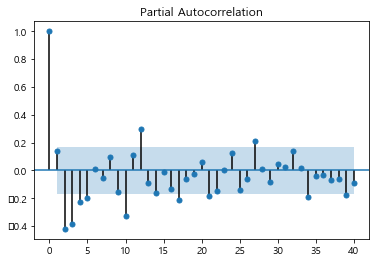

In [5]:
import statsmodels.api as sm

x_t = mean_of_month['kgPrice'][:-1]
x_t1 = mean_of_month['kgPrice'][1:]
y = np.log(x_t.values / x_t1.values)
sm.graphics.tsa.plot_pacf(y, lags=40)
plt.show()

In [42]:
a = MinMaxScaler(mean_of_month['kgPrice'].values)

In [43]:
a[:, 0:-1]

TypeError: 'MinMaxScaler' object is not subscriptable

In [40]:
a.get_params

<bound method BaseEstimator.get_params of MinMaxScaler(copy=True,
       feature_range=0       968.499267
1       837.201915
2      1011.106582
3      1091.977029
4       956.656570
5       856.522962
6      1092.739634
7      1324.099748
8       778.940863
9       794.514954
10      612.843249
11      426.795533
12      582.413457
13      594.806587
14      790.950294
1...
129     628.946874
130     536.997266
131     570.352129
Name: kgPrice, Length: 132, dtype: float64)>

In [37]:
a.values

AttributeError: 'MinMaxScaler' object has no attribute 'values'

In [24]:
print(MinMaxScaler(mean_of_month['kgPrice']))

MinMaxScaler(copy=True,
       feature_range=0       968.499267
1       837.201915
2      1011.106582
3      1091.977029
4       956.656570
5       856.522962
6      1092.739634
7      1324.099748
8       778.940863
9       794.514954
10      612.843249
11      426.795533
12      582.413457
13      594.806587
14      790.950294
1...
129     628.946874
130     536.997266
131     570.352129
Name: kgPrice, Length: 132, dtype: float64)


In [21]:
mean_of_month['kgPrice']

0      MinMaxScaler(copy=True,\n       feature_range=...
1      MinMaxScaler(copy=True,\n       feature_range=...
2      MinMaxScaler(copy=True,\n       feature_range=...
3      MinMaxScaler(copy=True,\n       feature_range=...
4      MinMaxScaler(copy=True,\n       feature_range=...
5      MinMaxScaler(copy=True,\n       feature_range=...
6      MinMaxScaler(copy=True,\n       feature_range=...
7      MinMaxScaler(copy=True,\n       feature_range=...
8      MinMaxScaler(copy=True,\n       feature_range=...
9      MinMaxScaler(copy=True,\n       feature_range=...
10     MinMaxScaler(copy=True,\n       feature_range=...
11     MinMaxScaler(copy=True,\n       feature_range=...
12     MinMaxScaler(copy=True,\n       feature_range=...
13     MinMaxScaler(copy=True,\n       feature_range=...
14     MinMaxScaler(copy=True,\n       feature_range=...
15     MinMaxScaler(copy=True,\n       feature_range=...
16     MinMaxScaler(copy=True,\n       feature_range=...
17     MinMaxScaler(copy=True,\

In [16]:
mean_of_month['kgPrice'] = MinMaxScaler(mean_of_month['kgPrice'])

In [17]:
x_t = mean_of_month['kgPrice'][3:]
x_t1 = mean_of_month['kgPrice'][2:-1]
x_t2 = mean_of_month['kgPrice'][1:-2]
x_t3 = mean_of_month['kgPrice'][:-3]

train_cut = -26
test_cut = 103

x_train = np.c_[ x_t1.values[:train_cut], x_t2.values[:train_cut], x_t3.values[:train_cut] ]
y_train = x_t.values[:train_cut].reshape(-1,1)
x_test = np.c_[ x_t1.values[test_cut:], x_t2.values[test_cut:], x_t3.values[test_cut:] ]
y_test = x_t.values[test_cut:].reshape(-1,1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(103, 3)
(103, 1)
(26, 3)
(26, 1)


## 히든레이어 1개

## 히든레이어 3개 + DROPOUT

In [18]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
D = tf.placeholder(tf.float32)
hidden1 = 10
hidden2 = 10
hidden3 = 10

W1 = tf.Variable(tf.random_normal([x_train.shape[1], hidden1]))
b1 = tf.Variable(tf.zeros([hidden1]))
H1 = tf.nn.relu(tf.matmul(X, W1)+b1)
H1 = tf.nn.dropout(H1, D)

W2 = tf.Variable(tf.random_normal([hidden1, hidden2]))
b2 = tf.Variable(tf.zeros([hidden2]))
H2 = tf.nn.relu(tf.matmul(H1, W2)+b2)
H2 = tf.nn.dropout(H2, D)

W3 = tf.Variable(tf.random_normal([hidden2, hidden3]))
b3 = tf.Variable(tf.zeros([hidden3]))
H3 = tf.nn.relu(tf.matmul(H2, W3)+b3)
H3 = tf.nn.dropout(H3, D)

W4 = tf.Variable(tf.random_normal([hidden3, 1]))
b4 = tf.Variable(tf.zeros([1]))
model = tf.matmul(H3, W4) + b4

cost = tf.reduce_mean(tf.square(model - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(10000):
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_train, Y: y_train, D: 0.8})
        if step % 1000 == 0: print("[step: {}	loss: {}]".format(step, cost_val))
    # 학습결과 확인
    predict = sess.run(model, feed_dict={X: x_test, D: 1})
#     print("Y:", sess.run(model, feed_dict={X:x_test }))

TypeError: float() argument must be a string or a number, not 'MinMaxScaler'

In [ ]:
compare_value = np.c_[y_test, predict]

# numppy array에 컬럼이름 주기
compare_value = {'실제값':compare_value[:,0], '예측값':compare_value[:,1]}

# Dataframe으로 만들기
compare_value = pd.DataFrame(compare_value)

In [9]:
compare_value['실제값_비율'] = -1
compare_value['예측값_비율'] = -1
compare_value['맞았니'] = ''

for i in range(len(compare_value) - 1):
    if(compare_value.iloc[i,0] - compare_value.iloc[i+1,0] > 0):
        compare_value.iloc[i,2] = 0
    else: compare_value.iloc[i,2] = 1
    if(compare_value.iloc[i,1] - compare_value.iloc[i+1,1] > 0):
        compare_value.iloc[i,3] = 0
    else: compare_value.iloc[i,3] = 1

for i in range(len(compare_value)):
    if(compare_value.iloc[i,2] == compare_value.iloc[i,3]):
        compare_value.iloc[i,4] = 1
    else:
        compare_value.iloc[i,4] = 0

# 오르고 내린거 맞춘 비율
compare_value.iloc[:-1,4].sum() / (x_test.shape[0] - 1)

0.68

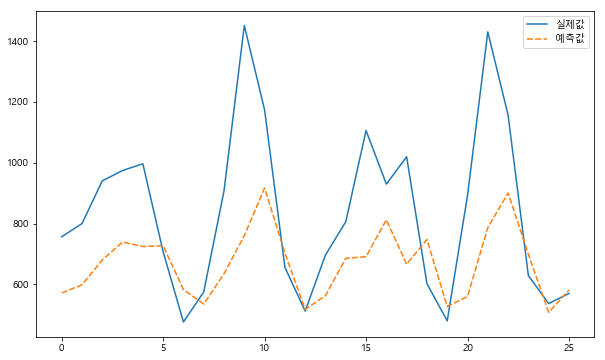

In [10]:
plt.figure(num=None, figsize=(10, 6))
sns.lineplot(data=compare_value.iloc[:,[0,1]])

## 한달 땡겨봄

## 한달 미뤄봄

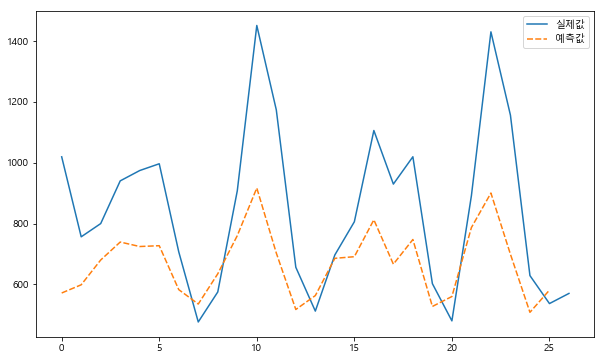

In [11]:
compare_value3 = pd.DataFrame(compare_value.iloc[:,0:1])

compare_value3.loc[-1] = x_t.values[102]  # adding a row
compare_value3.index = compare_value3.index + 1  # shifting index
compare_value3.sort_index(inplace=True) 
compare_value3 = pd.concat((compare_value3,compare_value.iloc[:,1]), axis=1)

plt.figure(num=None, figsize=(10, 6))
sns.lineplot(data=compare_value3)

In [12]:
compare_value3['실제값_비율'] = -1
compare_value3['예측값_비율'] = -1
compare_value3['맞았니'] = ''

for i in range(len(compare_value3) - 1):
    if(compare_value3.iloc[i,0] - compare_value3.iloc[i+1,0] > 0):
        compare_value3.iloc[i,2] = 0
    else: compare_value3.iloc[i,2] = 1
    if(compare_value3.iloc[i,1] - compare_value3.iloc[i+1,1] > 0):
        compare_value3.iloc[i,3] = 0
    else: compare_value3.iloc[i,3] = 1

for i in range(len(compare_value3)):
    if(compare_value3.iloc[i,2] == compare_value3.iloc[i,3]):
        compare_value3.iloc[i,4] = 1
    else:
        compare_value3.iloc[i,4] = 0

# 오르고 내린거 맞춘 비율
compare_value3.iloc[:-1,4].sum() / (x_test.shape[0] - 1)

0.84